https://github.com/karndeepsingh/Simple-Transformer-BERT/blob/master/BERT%20IMPLEMENTATION%20USING%20SIMPLE%20TRANSFORMERS.ipynb

https://simpletransformers.ai/

In [1]:
!pip install simpletransformers

     |████████████████████████████████| 215kB 14.3MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 1.2MB 45.1MB/s 
     |████████████████████████████████| 2.0MB 49.9MB/s 
     |████████████████████████████████| 194kB 54.2MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 7.0MB 50.6MB/s 
     |████████████████████████████████| 2.0MB 56.2MB/s 
     |████████████████████████████████| 3.2MB 45.1MB/s 
     |████████████████████████████████| 317kB 58.8MB/s 
     |████████████████████████████████| 133kB 58.9MB/s 
     |████████████████████████████████| 163kB 49.9MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 112kB 52.0MB/s 
     |████████████████████████████████| 245kB 57.7MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 4.6MB 49.9MB/s 
     |████████████████████████████████| 112kB 57.2MB

In [2]:
# pip install -r requirements.txt

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/karndeepsingh/Simple-Transformer-BERT/master/imdb_sentiment.csv")
data.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [5]:
data["sentiment"].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

In [6]:
#Independent and dependent variable
x = data["review"]
y = data["sentiment"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [8]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

In [9]:
model_args = ClassificationArgs()
model_args.num_train_epochs = 2
model_args.learning_rate = 1e-4

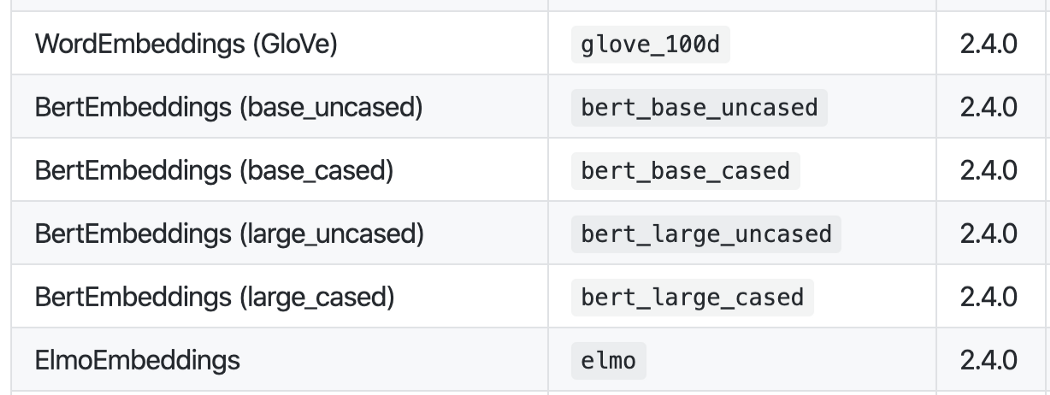

In [10]:
model = ClassificationModel("bert", "bert-base-cased",num_labels = 2,args=model_args)

# model = MultiLabelClassificationModel(
#     "roberta", "roberta-base", num_labels=4)

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [11]:
train_df = pd.DataFrame({"review":x_train, "sentiment":y_train})
eval_df = pd.DataFrame({"review":x_test, "sentiment":y_test})

In [12]:
train_df.head()

,review,sentiment
666,"I agree with Jessica, this movie is pretty bad.",0
22,"Overall, the film is interesting and thought-p...",1
194,"I think it was Robert Ryans best film, because...",1
206,It has northern humour and positive about the ...,1
601,How this piece of trash was ever released is b...,0


In [13]:
model.train_model(train_df, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:449: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/598 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/75 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/75 [00:00<?, ?it/s]

(150, 0.3970480573363602)

In [14]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/150 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

In [15]:
result

{'acc': 0.9266666666666666,
 'auprc': 0.9817794499536608,
 'auroc': 0.9722919655667146,
 'eval_loss': 0.245589611169539,
 'fn': 8,
 'fp': 3,
 'mcc': 0.8548787446265488,
 'tn': 65,
 'tp': 74}

In [16]:
x_test.iloc[4]

'The story line is just awful!  '

In [39]:
test_list = [",".join(item) for item in (x_test.values).astype(str)]

test_list = list(test_list)

print(type(test_list[1]))

<class 'str'>


In [40]:
preds, model_ouputs = model.predict(test_list)

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

In [41]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
model.predict(["The food is good"])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

(array([1]), array([[-2.921875  ,  2.52148438]]))